#                              Google PlayStore Dataset Analysis

## In this Notebook, we are going to analyse the dataset (taken from Kaggle) of all the Apps in the Google Play Store

### The series of steps followed are :

> #### 1. Importing Packages
> #### 2. Reading Data
> #### 3. Data Preprocessing
    > #### -  3.1 Handling NULL Values
    > #### -  3.2 Handling Data Types and Values
> #### 4. Analyzing Features
> #### 5. Furthur Analysis.

<a id='1'></a>
## 1. Importing the required packages. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

***

<a id='2'></a>
## 2.  Reading Data

In [33]:
df = pd.read_csv("googleplaystore.csv")

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


***

<a id='3.1'></a>

## 3. Data Preprocessing


### 3.1 Handling NULL Values

#### This is a very crucial step in every analysis and model, which on doing, improves the accuracy of insights and predictions.

In [34]:
print(df.isnull().sum())

df.dropna(inplace=True) #Dropping Rows with Null values


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


> #### There are many NULL values in Rating, and few in Type,Content Rating and Versions.

In [35]:
df.drop_duplicates(inplace=True)

> #### Removing Duplicate entries.

In [36]:
df.shape

(8886, 13)

>  ####   After removing the rows with Null values and the duplicate entries, We have got 8886 apps to analyze for their ratings and performance.

***

<a id='3.2'></a>
### 3.2 Handling Data Types of each Feature

#### The data types of each feature must be changed to a proper format that can be used for analysis.

In [37]:
df.dtypes  # Displaying Data types of each feature.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

> #### The feature *Reviews* must be of numerical type. So we should change it.

In [38]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

>  #### Other Features like *Size*, *Installs*, *Price* and *Android Vers* also must be of numeric type.
>  #### The values they are holding must be changed to a proper format so that we can use them for analysis and plots. 
>  #### Example : '10000+' to 10000

### Changing the Feature : Installs

In [39]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

### Changing the feature : Size

In [40]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

### Changing the feature, Price

In [41]:
newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()
    

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

### Changing the feature, Android Ver

In [42]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

***

<a id='4'></a>
## 4. Analyzing Features :

### 4.1 Categories

> ##### Displaying all the categories and their counts.

In [43]:
df.Category.value_counts() 

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

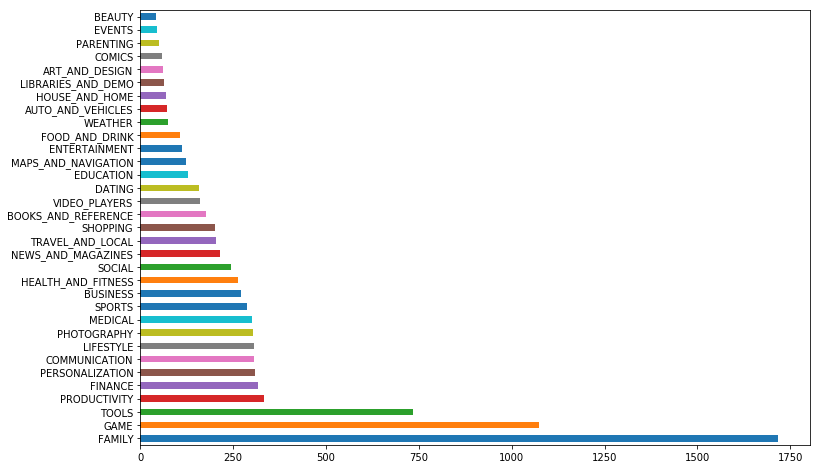

In [44]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

> #### **Insight** : Maximum Number of Apps belong to the Family and Game Category.

***

### 4.2  Rating

In [45]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

> #### Distribution Plot of 'Rating'

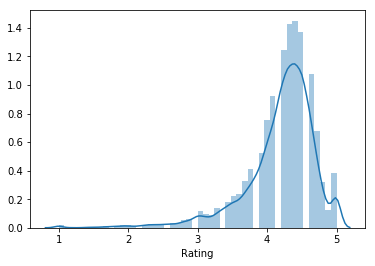

In [46]:
sns.distplot(df.Rating)

> #### Insight : Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating.

***

In [47]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


> #### There are 271 Apps in the store which hold 5.0 Ratings. Do all of these actually deserve it? Or are these spammed ratings? Lets analyze furthur.

***

### 4.3 Consider the Reviews:

> ##### Distribution Plot of the feature 'Reviews'

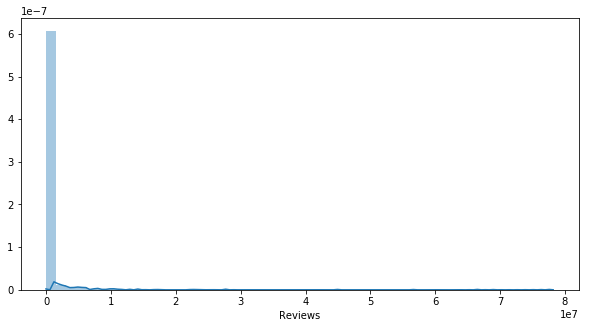

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

> #### Let's look into those apps which have a good amount of Reviews.

In [49]:
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


> #### Insight : The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

> Note : And I still have to figure out, how to remove the duplicate entries. My Apologies.

***

### 4.4  Type:

([<matplotlib.patches.Wedge at 0x7f64abdbd588>,
 [Text(-1.07444,0.235773,'Free'), Text(1.07444,-0.235773,'Paid')],
 [Text(-0.586056,0.128604,'93.1%'), Text(0.586056,-0.128604,'6.9%')])

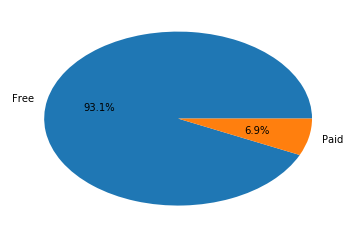

In [50]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

> #### Insight: 93% of the Apps are Free in the Play Store.

***

### 4.5 Price

In [51]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


> #### Insight : The most costly App in the Store is: *I'm Rich - Trump Edition* costing 400 Dollars!

***

### 4.6 Android Version

In [52]:
df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

> #### Count Plot of the various Versions

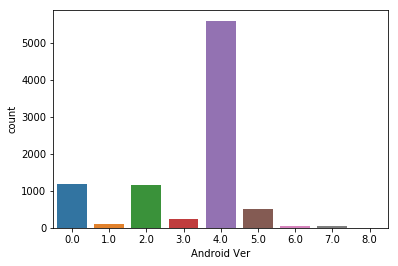

In [53]:
sns.countplot(df['Android Ver'])

> #### Insight : Most of the apps support Android 4.0 and above.


***

<a id='5'></a>
### 5. Furthur Analysis

### Looking at the Apps with 5.0 ratings:

In [54]:
df_full = df[df.Rating == 5]

df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0


> #### Distribution plot of 'Installs' of Apps with 5.0 Ratings

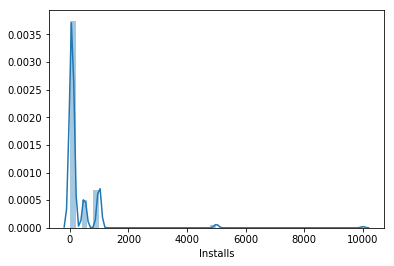

In [55]:
sns.distplot(df_full.Installs)

In [56]:
df_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

> #### Insight : There are many Apps that have full ratings but less downloads/installs. So we can't really consider those apps as the best ones.

***

### Consider the Apps with 5.0 Ratings and Maximum Installs :

In [57]:
df_full_maxinstalls = df_full[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0
8058,Oración CX,LIFESTYLE,5000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0


> ### Checking the No. of Reviews of 5.0 Rating Apps

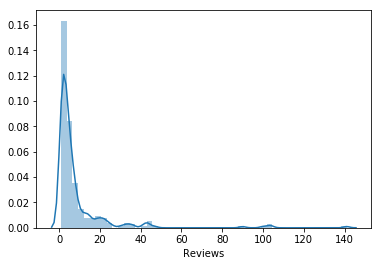

In [58]:
sns.distplot(df_full.Reviews)

> #### The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading.
> #### So let's filter out the ones with more than 30 reviews. These filtered ones are the apps that really stand for 5.0 rating.

In [59]:
df_full = df_full[df.Reviews > 30]

In [60]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


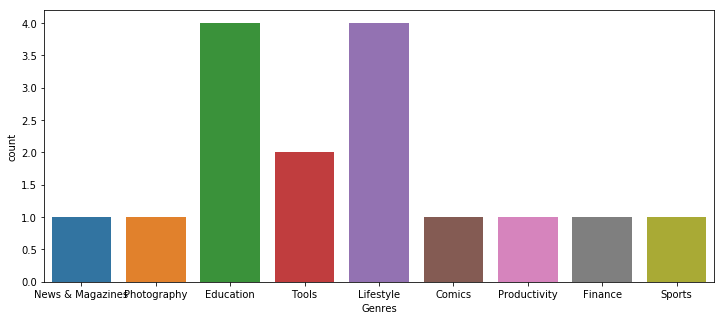

In [61]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)


> #### Insight : Apps related to Education, LifeStyle and Tools seem to fetch full Ratings with sufficient number of reviews.

***

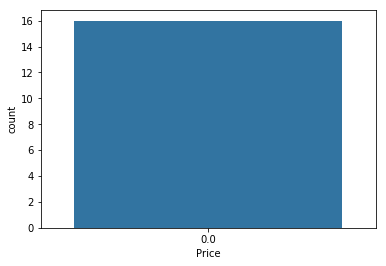

In [62]:
sns.countplot(df_full.Price)

> #### Insight : All the Apps with 5.0 ratings are Free to install.

***